In [1]:
from pandas_datareader import data,wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline

In [2]:
start = datetime.datetime(2005,1,1)
end = datetime.datetime(2019,1,1)

In [3]:
BAC = data.DataReader('BAC','yahoo',start,end)
C = data.DataReader('C','yahoo',start,end)
GS = data.DataReader('GS','yahoo',start,end)
JPM = data.DataReader('JPM','yahoo',start,end)
MS = data.DataReader('MS','yahoo',start,end)
WFC = data.DataReader('WFC','yahoo',start,end)

In [4]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [5]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [7]:
bank_stocks.head(5)

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2005-01-03   46.950001  46.180000  46.660000  46.459999  10238100.0   
2005-01-04   46.730000  45.740002  46.410000  45.820000  10264100.0   
2005-01-05   45.939999  45.250000  45.639999  45.290001  14796100.0   
2005-01-06   45.630001  44.990002  45.419998  45.220001  14602200.0   
2005-01-07   45.360001  44.720001  45.299999  44.730000  10547200.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2005-01-03   34.027966  490.000000  482.000000  490.000000  482.700012  ...   
2005-01-04   33.559219  487.700012  477.000000  482.799988  478.600006  ...   
2005-01-05   33.171024  487.799988  480.200012  480.500000  484.600006  ...   
2005-01-06   33.119766  492.399994  487.399994  488.000000  489.299988  ...   
2005-01-07   32.760872  491.100006  486.000000  491.000000  486.500000  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2005-01-03   55.970001  55.900002  5105800.0  35.983555  31.165001  30.875000   
2005-01-04   56.000000  55.299999  6100300.0  35.597324  31.250000  30.885000   
2005-01-05   55.049999  54.980000  5072100.0  35.391331  31.375000  30.975000   
2005-01-06   55.950001  56.279999  5991400.0  36.228157  31.150000  30.900000   
2005-01-07   56.450001  56.060001  4269900.0  36.086552  31.280001  31.030001   

Bank Ticker                                              
Stock Info        Open      Close     Volume  Adj Close  
Date                                                     
2005-01-03   31.115000  30.955000  8168200.0  19.296320  
2005-01-04   30.975000  30.980000  9241400.0  19.311914  
2005-01-05   31.040001  31.014999  7694600.0  19.333727  
2005-01-06   31.049999  31.125000  8887600.0  19.402292  
2005-01-07   31.170000  31.084999  6573200.0  19.377361  

[5 rows x 36 columns]

In [8]:
for tick in tickers:
    print(f"{tick} {bank_stocks[tick]['Close'].max()}")

BAC 54.900001525878906
C 564.0999755859375
GS 273.3800048828125
JPM 118.7699966430664
MS 89.30000305175781
WFC 65.93000030517578


In [9]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     273.380005
JPM    118.769997
MS      89.300003
WFC     65.930000
dtype: float64

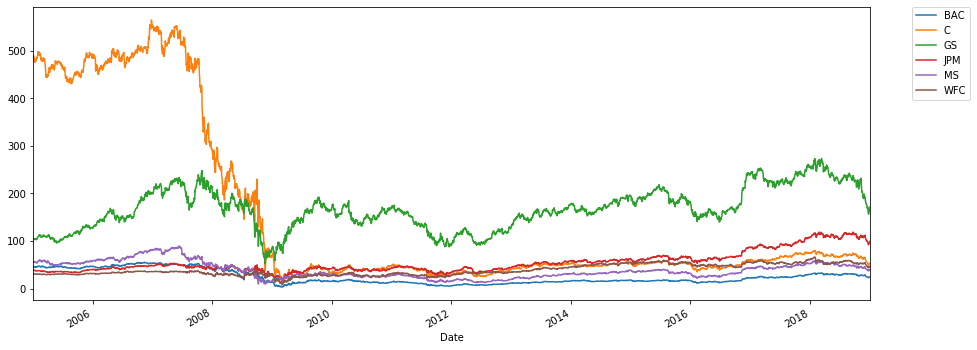

In [10]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(15,6))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

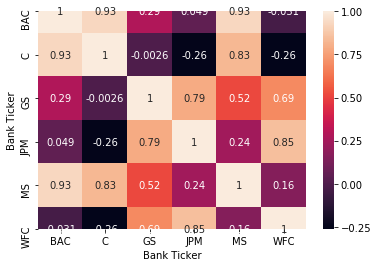

In [14]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

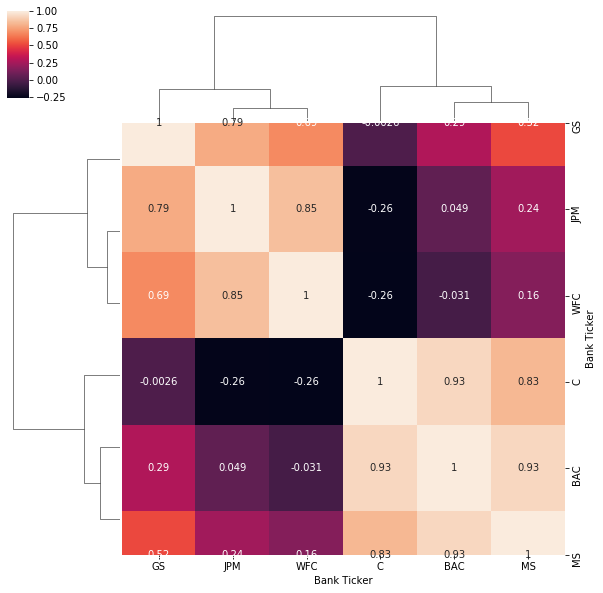

In [15]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)